#### **Initialization**
* I use these 3 lines of code on top of my each notebook because it won't cause any trouble while reloading or reworking on the Project or Problem. And the third line of code helps to make visualization within the Notebook.

In [1]:
# Initialization
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#### **Downloading the Dependencies**
* I prefer to download all necessary Libraries and Dependencies on one particular cell which mainly focus on Libraries and Dependencies.

In [49]:
# Downloading and loading the Libraries and Dependencies
# !pip install jupyterthemes
# !pip install WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from IPython.display import display
from jupyterthemes import jtplot
jtplot.style(theme = "monokai", context = "notebook", ticks = True, grid = False)
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")
import nltk
# nltk.download("stopwords")
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

**Getting the Data**
* I have manually downloaded the Data from [Kaggle](https://www.kaggle.com/). I am using Google Colab for this Project so the act of reading and loading the Data might be different in differnt platforms.

In [5]:
# Loading and reading the Data
PATH = "/content/drive/My Drive/Twitter"

# Creating DataFrame
tweets_df = pd.read_csv(os.path.join(PATH, "twitter.csv"))

**Inspecting the DataFrame**
* Now, I am going to take the overview of the DataFrame defined above and I will walk through each process so you can gain more insights from it.

In [6]:
# Looking the DataFrame
display(tweets_df.head(10));
tweets_df.shape

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


(31962, 3)

* Here, In DataFrame, the __label 0__ indicates the positive tweets and __label 1__ indicates the negative tweets.

#### **Exploratory Data Analysis**

**Statistical Exploration**

In [7]:
# Observing the Datatypes and null-values in the DataFrame
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [8]:
# Observing the basic statistics of Numerical columns
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [9]:
# Observing the tweet column of the DataFrame
tweets_df["tweet"].head(15)

0      @user when a father is dysfunctional and is s...
1     @user @user thanks for #lyft credit i can't us...
2                                   bihday your majesty
3     #model   i love u take with u all the time in ...
4                factsguide: society now    #motivation
5     [2/2] huge fan fare and big talking before the...
6      @user camping tomorrow @user @user @user @use...
7     the next school year is the year for exams.ð...
8     we won!!! love the land!!! #allin #cavs #champ...
9      @user @user welcome here !  i'm   it's so #gr...
10     â #ireland consumer price index (mom) climb...
11    we are so selfish. #orlando #standwithorlando ...
12    i get to see my daddy today!!   #80days #getti...
13    @user #cnn calls #michigan middle school 'buil...
14    no comment!  in #australia   #opkillingbay #se...
Name: tweet, dtype: object

* In the DataFrame, the "id" column is simply the index of the Data. So, the "id" column is dropped from the DataFrame.

In [10]:
# Dropping the id column from the DataFrame
tweets_df = tweets_df.drop(["id"], axis = 1)
display(tweets_df.head());
tweets_df.shape

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


(31962, 2)

#### **Data Visualization**


* Checking whether the DataFrame contains the null values in any columns.

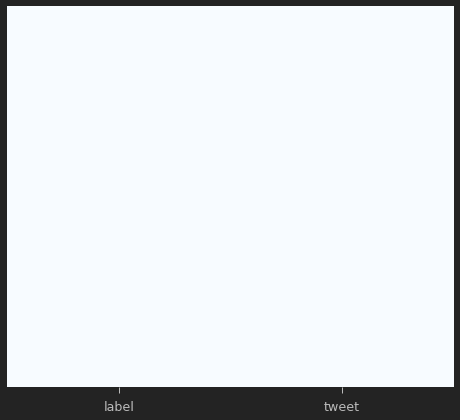

In [11]:
# Checking the null values
sns.heatmap(tweets_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

* From the Heatmap, it can be concluded that there is no null values in the DataFrame.

**Histograms**
* Histograms show the distribution of numeric data in which data is divide into bins or buckets.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f735b2884e0>]],
      dtype=object)

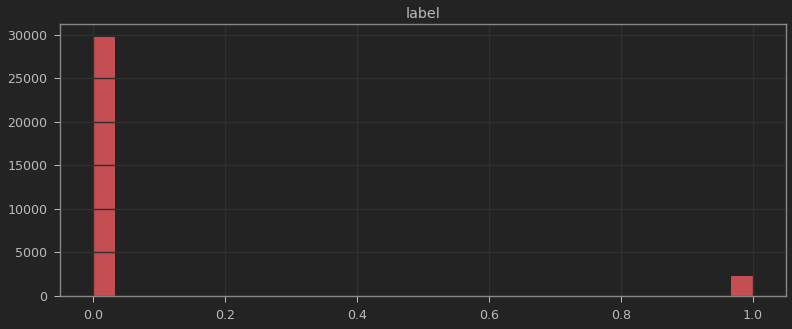

In [12]:
# Creating the Histograms of DataFrame
tweets_df.hist(bins=30, figsize=(13, 5), color = "r")

* From the plot obtained above, it can be concluded that there is class imbalance in the label column of the DataFrame. As the positive label is about 30000 and negative label is less than 5000.

**Countplot**
* Plotting the Countplot of label column using seaborn.

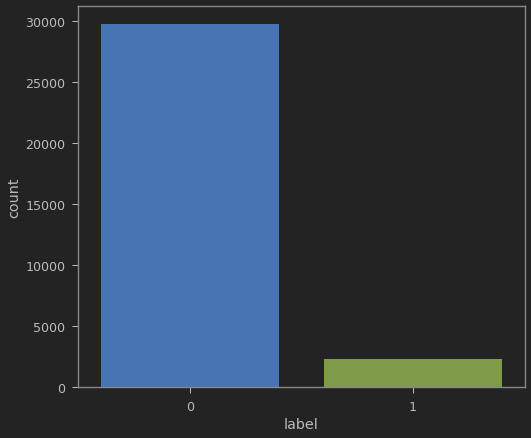

In [13]:
# Plotting the countplot of the label column using seaborn
sns.countplot(tweets_df["label"], label="Cont")

* Now, Getting the length of every tweets of tweet column in the DataFrame. Creating a new column in the DataFrame.

In [14]:
# Getting the length of every tweets 
tweets_df["length"] = tweets_df["tweet"].apply(len)
tweets_df.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


* Plotting the Histogram of the length column of the DataFrame.

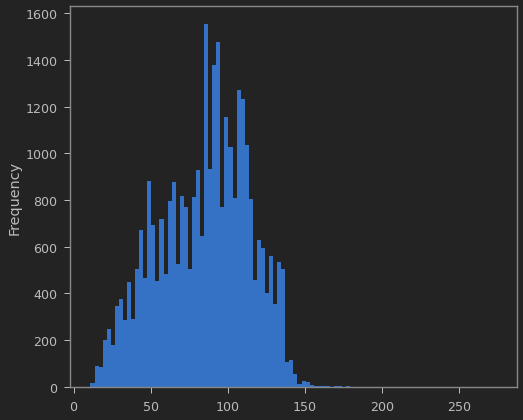

In [15]:
# Plotting the length column
tweets_df["length"].plot(bins = 100, kind = "hist")

In [17]:
# Observing the DataFrame
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


* Observing the shortest and average length of tweets in the DataFrame.

In [22]:
# Shortest tweet
display(tweets_df[tweets_df["length"] == 11]["tweet"].iloc[0]);

# Average length of tweet
tweets_df[tweets_df["length"] == 84]["tweet"].iloc[0]

'i love you '

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

**Positive and Negative tweet DataFrame**
* Positive Tweet DataFrame

In [23]:
# Creating positive tweet dataframe
positive = tweets_df[tweets_df["label"] == 0]
positive.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


* Negative Tweet DataFrame

In [25]:
# Creating negative tweet dataframe
negative = tweets_df[tweets_df["label"] == 1]
negative.head()

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104


**Plotting the WordCloud**

* Creating the new list of tweet column from the DataFrame and giving it "sentences" name variable.

In [26]:
# Creating the new list of sentences
sentences = tweets_df["tweet"].tolist()
sentences[:5]

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation']

* Creating a single string by joining all the elements of the "sentences" list.


In [27]:
# Creating the single string
sentences_string = " ".join(sentences)
type(sentences_string)

str

* Creating the WordCloud.

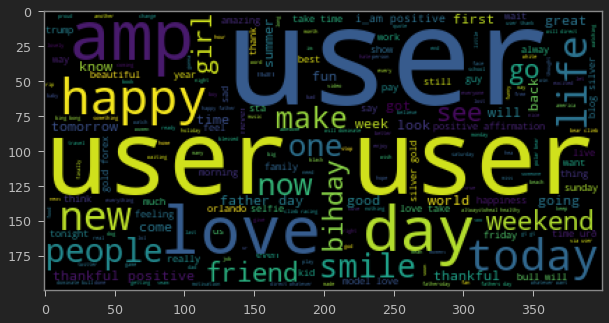

In [30]:
# Creating the Wordcloud of the string obtained above.
plt.figure(figsize=(10, 10))
plt.imshow(WordCloud().generate(sentences_string))

* Creating WordCloud of the negative DataFrame.

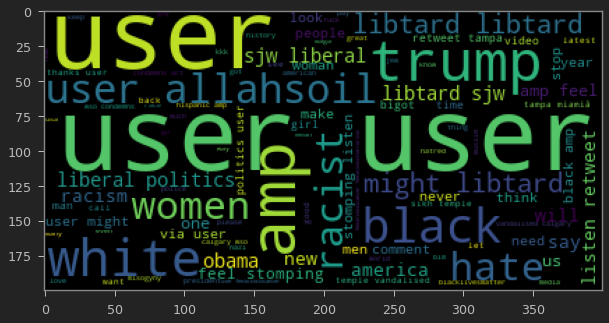

In [32]:
# Creating the WordCloud of the Negative tweet DataFrame.
sentences = negative["tweet"].tolist()
sentences_string = " ".join(sentences)
plt.figure(figsize=(10, 10))
plt.imshow(WordCloud().generate(sentences_string))

#### **Data Preprocessing**

In [38]:
# Important step for accessing the Punctuation
import string
display(string.punctuation);

# Important step for accessing the Stopwords
stopwords.words("english")[:5]

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

['i', 'me', 'my', 'myself', 'we']

#### **Count Vectorizer and Tokenization**
* CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

**Creating Pipeline**
* Creating Pipeline to remove Punctuation, Stopwords and Performing Count Vectorization.

In [40]:
# Creating Pipeline
def cleaning(message):
  punc_remove = [char for char in message if char not in string.punctuation]
  join_punc_remove = "".join(punc_remove)
  join_clean = [word for word in join_punc_remove.split() if word.lower() not in stopwords.words("english")]
  return join_clean

* Applying the Defined function in Tweet DataFrame.

In [41]:
# Applying the cleaning function in tweet column
tweets_df_clean = tweets_df["tweet"].apply(cleaning)
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


**Applying the CountVectorizer**

In [43]:
# Applying the CountVectorizer
vectorizer = CountVectorizer(analyzer=cleaning)
tweets_vectorizer = CountVectorizer(analyzer=cleaning, dtype="uint8").fit_transform(tweets_df["tweet"])
tweets_vectorizer.shape

(31962, 47386)

**Preparing the Model**


In [46]:
# Preparing the Features and Target columns
X = tweets_vectorizer
y = tweets_df["label"]
X.shape, y.shape

((31962, 47386), (31962,))

#### **Naive Bayes**
* In statistics, Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models.


**Preparing the Model**
* Creating the Training and Testing Dataset.

In [47]:
# Creating the Training and Testing Dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25569, 47386), (6393, 47386), (25569,), (6393,))

**Training the Classifier**

In [48]:
# Training the Classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Model Evaluation**
* Checking the accuracy in Testing Data.

In [50]:
# Using the fitted model to make predictions on testing data
test_predict = classifier.predict(X_test)

print(f"Model evaluation on Testing Data:\n {confusion_matrix(y_test, test_predict)}")
print(f"Classification Report:\n {classification_report(y_test, test_predict)}")
print(f"Testing accuracy:\n {accuracy_score(y_test, test_predict)}")

Model evaluation on Testing Data:
 [[5758  169]
 [ 239  227]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      5927
           1       0.57      0.49      0.53       466

    accuracy                           0.94      6393
   macro avg       0.77      0.73      0.75      6393
weighted avg       0.93      0.94      0.93      6393

Testing accuracy:
 0.9361801970905678


**Plotting the Heatmap**

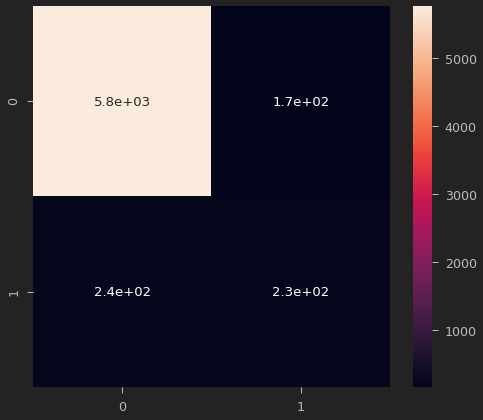

In [51]:
# Plotting the heatmap of confusion matrix
cm = confusion_matrix(y_test, test_predict)
sns.heatmap(cm, annot=True)